### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [51]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [52]:
#Read data into Jupyter notebook and use pandas to import data into a data frame

In [53]:
data = pd.read_csv("data.csv")

In [54]:
#Preprocess data: Explore data

In [55]:
data.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0


In [56]:
#I notice here that a lot of columns contain JSON data
data.head(5)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


In [57]:
#20,000 rows of data with 22 columns.
data.shape

(20000, 22)

In [58]:
#Display Columns
list(data)

['channelGrouping',
 'customDimensions',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'hits',
 'socialEngagementType',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'totals_bounces',
 'totals_hits',
 'totals_newVisits',
 'totals_pageviews',
 'totals_sessionQualityDim',
 'totals_timeOnSite',
 'totals_totalTransactionRevenue',
 'totals_transactionRevenue',
 'totals_transactions',
 'totals_visits']

In [59]:
#check for missing data

In [60]:
data.isnull().sum()

channelGrouping                       0
customDimensions                      0
date                                  0
device                                0
fullVisitorId                         0
geoNetwork                            0
hits                                  0
socialEngagementType                  0
trafficSource                         0
visitId                               0
visitNumber                           0
visitStartTime                        0
totals_bounces                    10127
totals_hits                           0
totals_newVisits                   4912
totals_pageviews                      1
totals_sessionQualityDim          10880
totals_timeOnSite                  9899
totals_totalTransactionRevenue    19807
totals_transactionRevenue         19807
totals_transactions               19804
totals_visits                         0
dtype: int64

In [61]:
salesData = data[data.totals_totalTransactionRevenue > 0] 

In [62]:
#Note that the totalTransactionRevenue is different from the transactionRevenue (also curiously large)
print(salesData.iloc[0]['totals_totalTransactionRevenue'])
print(salesData.iloc[0]['totals_transactionRevenue'])

17190000.0
15190000.0


In [63]:
#A significant amount of the transaction data is NaN. It looks like there are only 193 sales.
#A NaN transaction would be 0. if the transaction is 0 the total revenue is also 0.
data['totals_totalTransactionRevenue'] = data['totals_totalTransactionRevenue'].fillna(0)
data['totals_transactionRevenue'] = data['totals_transactionRevenue'].fillna(0)
data['totals_transactions'] = data['totals_transactions'].fillna(0)

In [64]:
data.isnull().sum()

channelGrouping                       0
customDimensions                      0
date                                  0
device                                0
fullVisitorId                         0
geoNetwork                            0
hits                                  0
socialEngagementType                  0
trafficSource                         0
visitId                               0
visitNumber                           0
visitStartTime                        0
totals_bounces                    10127
totals_hits                           0
totals_newVisits                   4912
totals_pageviews                      1
totals_sessionQualityDim          10880
totals_timeOnSite                  9899
totals_totalTransactionRevenue        0
totals_transactionRevenue             0
totals_transactions                   0
totals_visits                         0
dtype: int64

In [65]:
#It's time to convert the JSON strings to a dictionary and then convert the dictionary to a data frame

In [66]:
#This function will literally evaulate the expression and return it's value.
#This can be used to covert JSON to a dictionary in a single line of code.

#Note eval() is evil. if this program read untrusted data this would allow an attacker to run arbitary code.

#But for this project i'm keeing it simple

def string_to_dict_simple(dict_string):
    return ast.literal_eval(dict_string)

In [67]:
#This column doesn't seem to provide much value. I'll be dropping it.

customDimensionsData = data['customDimensions'].apply(string_to_dict_simple)
customDimensionsDataFrame = pd.DataFrame(list(customDimensionsData))

customDimensionsDataFrame.head()

,0
0,"{'index': '4', 'value': 'EMEA'}"
1,"{'index': '4', 'value': 'North America'}"
2,"{'index': '4', 'value': 'North America'}"
3,"{'index': '4', 'value': 'EMEA'}"
4,"{'index': '4', 'value': 'Central America'}"


In [68]:
#Device Data provides several useful columns. anything not available in the demo dataset will be dropped
deviceData = data['device'].apply(string_to_dict_simple)
deviceDataFrame = pd.DataFrame(list(deviceData))

deviceDataFrame.head()

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [69]:
#Useful geographic information
geoData = data['geoNetwork'].apply(string_to_dict_simple)
geoDataFrame = pd.DataFrame(list(geoData))

geoDataFrame.head()

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe
1,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America
2,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,not available in demo dataset,not available in demo dataset,Northern America
3,not available in demo dataset,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Western Asia
4,not available in demo dataset,not available in demo dataset,Americas,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,not available in demo dataset,Central America


In [70]:
#I have no idea what to do with this information... it's so much and so nested. I'll be dropping this column.

print(data['hits'][1])
#hitsData = data['hits'].apply(string_to_dict_simple)
#hitsDataFrame = pd.DataFrame(list(hitsData))

#hitsDataFrame.head()

[{'hitNumber': '1', 'time': '0', 'hour': '10', 'minute': '51', 'isInteraction': True, 'isEntrance': True, 'referer': 'https://sites.google.com/a/google.com/transportation/mtv-services/bikes/bike2workmay2016', 'page': {'pagePath': '/home', 'hostname': 'shop.googlemerchandisestore.com', 'pageTitle': 'Home', 'searchKeyword': 'jersey', 'searchCategory': '(not set)', 'pagePathLevel1': '/home', 'pagePathLevel2': '', 'pagePathLevel3': '', 'pagePathLevel4': ''}, 'appInfo': {'screenName': 'shop.googlemerchandisestore.com/home', 'landingScreenName': 'shop.googlemerchandisestore.com/home', 'exitScreenName': 'shop.googlemerchandisestore.com/asearch.html', 'screenDepth': '0'}, 'exceptionInfo': {'isFatal': True}, 'product': [], 'promotion': [{'promoId': 'Apparel Row 1', 'promoName': 'Apparel', 'promoCreative': 'home_main_link_apparel.jpg', 'promoPosition': 'Row 1'}, {'promoId': 'Backpacks Row 2 Combo', 'promoName': 'Backpacks', 'promoCreative': 'home_bags_google_2.jpg', 'promoPosition': 'Row 2 Combo

In [71]:
#Traffic data seems to provide some useful information such as medium and source

trafficSourceData = data['trafficSource'].apply(string_to_dict_simple)
trafficSourceDataFrame = pd.DataFrame(list(trafficSourceData))
trafficSourceDataFrame.drop(columns=['adwordsClickInfo'], inplace=True)
trafficSourceDataFrame.head()

,adContent,campaign,isTrueDirect,keyword,medium,referralPath,source
0,NaN,(not set),NaN,water bottle,organic,NaN,google
1,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,NaN,(not set),True,NaN,(none),NaN,(direct)
3,NaN,(not set),NaN,(not provided),organic,NaN,google
4,NaN,(not set),NaN,(not provided),organic,NaN,google


In [72]:
#Drop JSON dictionary columns from the data frame
data.drop(columns=['customDimensions','hits','trafficSource','device','geoNetwork'], inplace=True)
data.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,2.0,2.0,28.0,0.0,0.0,0.0,1
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,NaN,2,1.0,2.0,1.0,38.0,0.0,0.0,0.0,1
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,NaN,2,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,NaN,2,1.0,2.0,1.0,52.0,0.0,0.0,0.0,1


In [73]:
#Add new dictionary based dataframes to parent dataframe to replace dropped columns
newData = pd.concat([data, deviceDataFrame, geoDataFrame, trafficSourceDataFrame], axis=1)

In [74]:
#I'll be replacing all string values of 'not available in demo dataset' with NaN in order to check for more missing data
newData = newData.replace('not available in demo dataset', np.nan, regex=True)
newData.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,networkLocation,region,subContinent,adContent,campaign,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,NaN,NaN,Western Europe,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,...,NaN,California,Northern America,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,NaN,2,1.0,...,NaN,NaN,Northern America,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,NaN,2,1.0,...,NaN,NaN,Western Asia,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,NaN,2,1.0,...,NaN,NaN,Central America,NaN,(not set),NaN,(not provided),organic,NaN,google


In [75]:
#Let's check out how the new data looks
newData.iloc[0]

channelGrouping                         Organic Search
date                                          20171016
fullVisitorId                      3162355547410993243
socialEngagementType              Not Socially Engaged
visitId                                     1508198450
visitNumber                                          1
visitStartTime                              1508198450
totals_bounces                                       1
totals_hits                                          1
totals_newVisits                                     1
totals_pageviews                                     1
totals_sessionQualityDim                             1
totals_timeOnSite                                  NaN
totals_totalTransactionRevenue                       0
totals_transactionRevenue                            0
totals_transactions                                  0
totals_visits                                        1
browser                                        Firefox
browserSiz

In [76]:
#Drop any columns with more that 50% missing values as they will not be useful and challenging to populate with data
half_count = len(newData) / 2
newData = newData.dropna(thresh=half_count,axis=1)

In [77]:
#search for more missing data. Due to the high volume of misses let's drop totals_timeOnSite and totals_newVisits
null_counts = newData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
channelGrouping                      0
date                                 0
fullVisitorId                        0
socialEngagementType                 0
visitId                              0
visitNumber                          0
visitStartTime                       0
totals_hits                          0
totals_newVisits                  4912
totals_pageviews                     1
totals_timeOnSite                 9899
totals_totalTransactionRevenue       0
totals_transactionRevenue            0
totals_transactions                  0
totals_visits                        0
browser                              0
deviceCategory                       0
isMobile                             0
operatingSystem                      0
continent                            0
country                              0
networkDomain                        0
subContinent                         0
campaign                             0
medium                    

In [78]:
print(newData.shape[0])
print(newData.columns.tolist())

20000
['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_timeOnSite', 'totals_totalTransactionRevenue', 'totals_transactionRevenue', 'totals_transactions', 'totals_visits', 'browser', 'deviceCategory', 'isMobile', 'operatingSystem', 'continent', 'country', 'networkDomain', 'subContinent', 'campaign', 'medium', 'source']


In [79]:
#Let's see how the trimmed data looks
newData.iloc[0]

channelGrouping                         Organic Search
date                                          20171016
fullVisitorId                      3162355547410993243
socialEngagementType              Not Socially Engaged
visitId                                     1508198450
visitNumber                                          1
visitStartTime                              1508198450
totals_hits                                          1
totals_newVisits                                     1
totals_pageviews                                     1
totals_timeOnSite                                  NaN
totals_totalTransactionRevenue                       0
totals_transactionRevenue                            0
totals_transactions                                  0
totals_visits                                        1
browser                                        Firefox
deviceCategory                                 desktop
isMobile                                         False
operatingS

In [80]:
#There is only one value in this column. Let's drop it
newData["socialEngagementType"].unique()

array(['Not Socially Engaged'], dtype=object)

In [81]:
#These values seem to be meaningless. Let's drop them
newData["networkDomain"].unique()

array(['(not set)', 'windjammercable.net', 'unknown.unknown', ...,
       'unl.edu.ec', 'unknown.se', 'alltele.net'], dtype=object)

In [82]:
#I don't know how to read these values. Let's drop them
newData["campaign"].unique()

array(['(not set)', '"google + redesign/Accessories March 17" All Users',
       'AW - Dynamic Search Ads Whole Site',
       '1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS',
       'Data Share Promo',
       'Page: contains "/google+redesign/bags" All Users',
       '1000557 | GA | US | en | Hybrid | GDN Remarketing',
       'Page: contains "/google+redesign/office"',
       'Page: contains "/google+redesign/drinkware"',
       'Page: contains "/google+redesign/bags" 1 Day', 'AW - Electronics',
       'AW - Accessories', 'Smart Display Campaign',
       '"google + redesign/Accessories March 17" All Users Similar Audiences',
       'Page: contains "/google+redesign/drinkware" Similar Audiences',
       'Run of Network Line Item', 'Technology/Technophiles'],
      dtype=object)

In [83]:
drop_cols = ['socialEngagementType','networkDomain','campaign','totals_newVisits','totals_timeOnSite']

In [84]:
#As we saw earlier one row had a total page view as null. Let's check out the row
newData[newData['totals_pageviews'].isnull()]

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_hits,totals_newVisits,totals_pageviews,...,deviceCategory,isMobile,operatingSystem,continent,country,networkDomain,subContinent,campaign,medium,source
7891,Organic Search,20171130,8515300288544406129,Not Socially Engaged,1512040459,2,1512040459,1,NaN,NaN,...,desktop,False,Windows,Oceania,Australia,bigpond.net.au,Australasia,(not set),organic,google


In [85]:
#I'll go ahead and fill the value in a 1 page view since that is the most common value of page views
newData['totals_pageviews'] = data['totals_pageviews'].fillna(1)

In [86]:
newData = newData.drop(drop_cols,axis=1)

In [87]:
newData.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_hits,totals_pageviews,totals_totalTransactionRevenue,totals_transactionRevenue,...,totals_visits,browser,deviceCategory,isMobile,operatingSystem,continent,country,subContinent,medium,source
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,1,1.0,0.0,0.0,...,1,Firefox,desktop,False,Windows,Europe,Germany,Western Europe,organic,google
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,2,2.0,0.0,0.0,...,1,Chrome,desktop,False,Chrome OS,Americas,United States,Northern America,referral,sites.google.com
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,2,2.0,0.0,0.0,...,1,Chrome,mobile,True,Android,Americas,United States,Northern America,(none),(direct)
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,2,2.0,0.0,0.0,...,1,Chrome,desktop,False,Windows,Asia,Turkey,Western Asia,organic,google
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,2,2.0,0.0,0.0,...,1,Chrome,desktop,False,Windows,Americas,Mexico,Central America,organic,google


In [88]:
#Some of the models I ran struggled with the complex dataframe. I'm creating a simpler data set to compare

#I'm going to trim some more columns in order to work with a simpler data set and compare it to the more complex one
newDataSimple = newData.copy()

In [89]:
#print(newData.columns.tolist())
newData["totals_hits"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  43,  45,  46,  47,  50,  52,  56,  58,  62,  66,  69,
        74,  75,  85,  90,  93,  94, 138, 165,  42,  44,  48,  49,  51,
        54,  55,  57,  65,  67,  72,  79,  82,  83,  92, 103, 109, 134,
       143, 144,  53,  61,  70, 106, 137,  73, 112, 189,  63,  81,  91,
       102, 161,  86,  99,  80,  89, 100,  71,  76,  77,  95, 229,  64,
       154,  78,  84,  87,  97, 104, 108, 115, 119, 136], dtype=int64)

In [90]:
#Let's reduce the factors and compare revenue to just date, browser, visits, and revenue only

In [91]:
newDataSimple = newData.filter(['date','browser','totals_visits','totals_totalTransactionRevenue'], axis=1)

In [92]:
print(newDataSimple.columns.tolist())

['date', 'browser', 'totals_visits', 'totals_totalTransactionRevenue']


In [93]:
#Before we do feature engineering let's take a look at the sales data

In [94]:
salesData = 0
salesData = newData[newData.totals_totalTransactionRevenue > 0] 

In [95]:
#We can see we only have 193 sales
salesData.shape

(193, 21)

In [96]:
#Converting the data from a string to date value for better charting
salesData['date'] =  pd.to_datetime(salesData['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d");

#salesData['column_name'].map('{:,.2f}'.format)

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


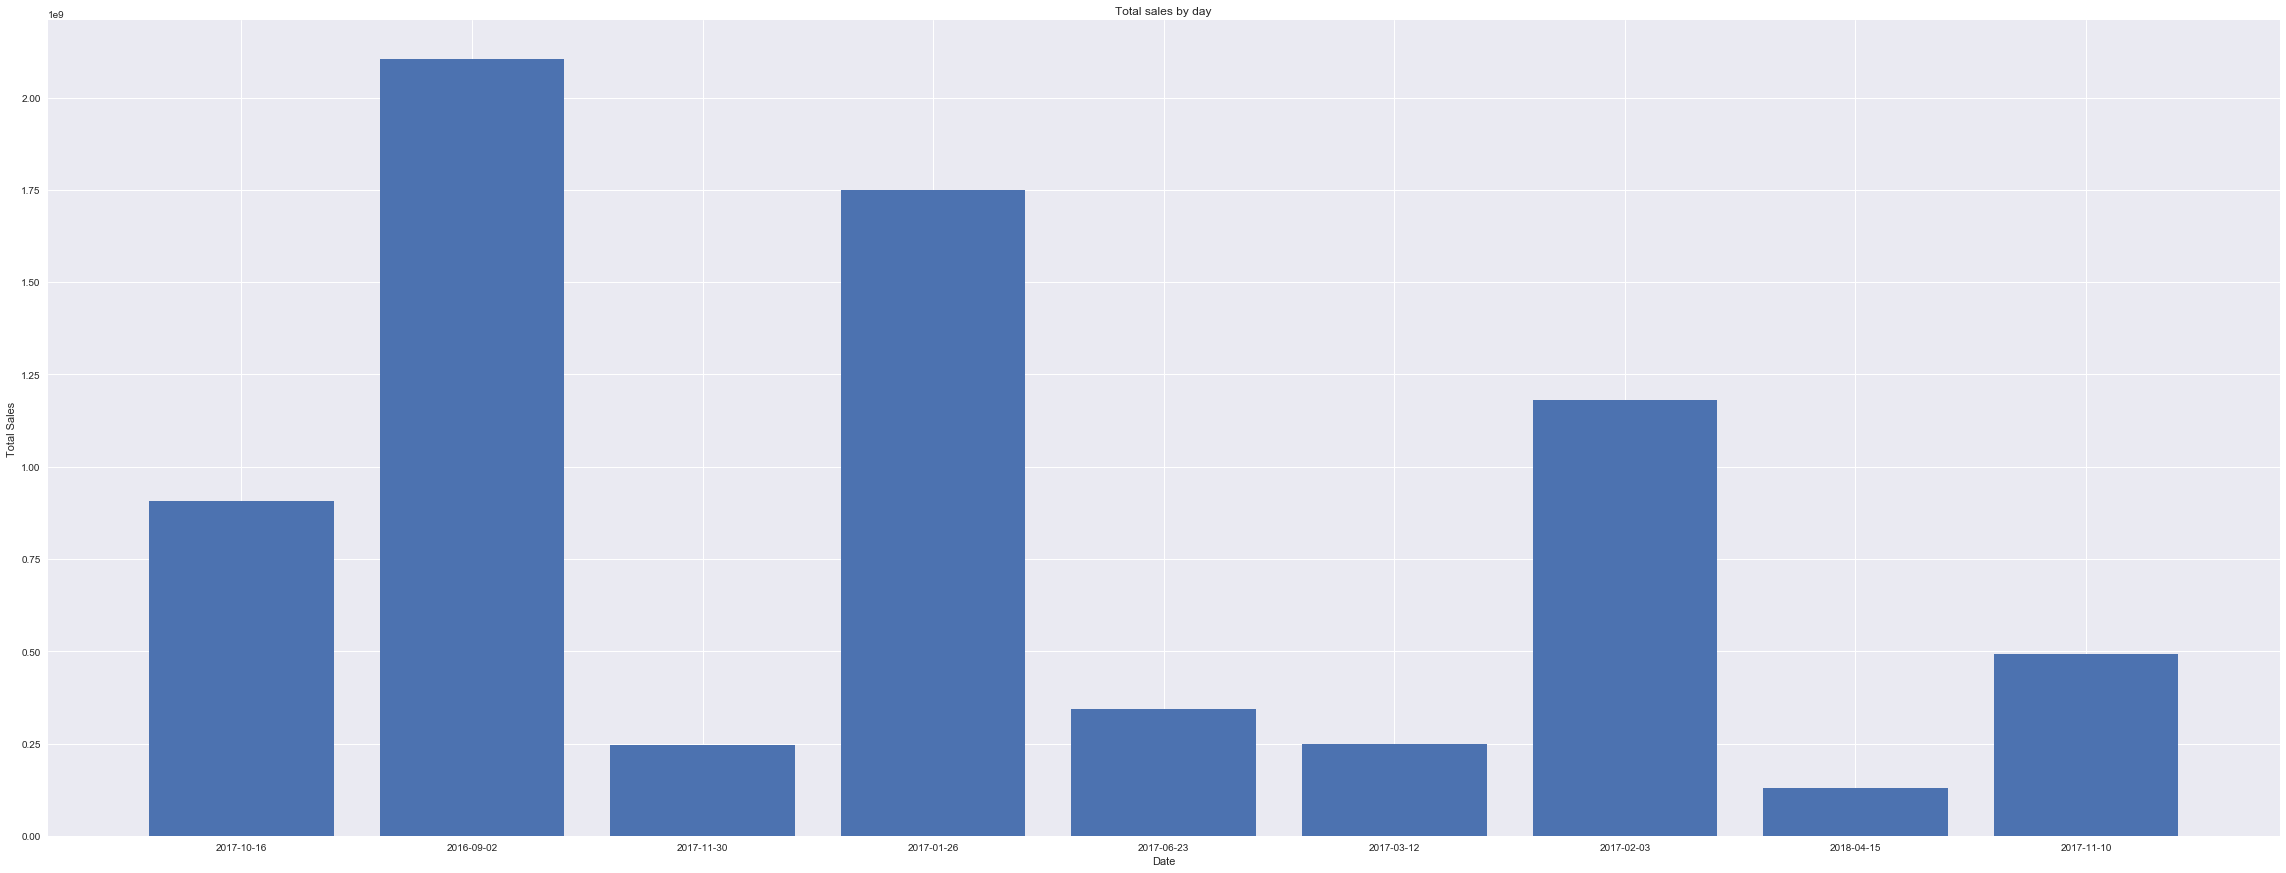

In [97]:
#Plot sales revenue per day
fix, ax = plt.subplots(figsize=(40,15))

plt.bar(salesData['date'], salesData['totals_totalTransactionRevenue'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')

ax.set_title('Total sales by day')

plt.show()

In [98]:
#Group the data by browser
browserGroup = salesData.groupby('browser').sum().reset_index()

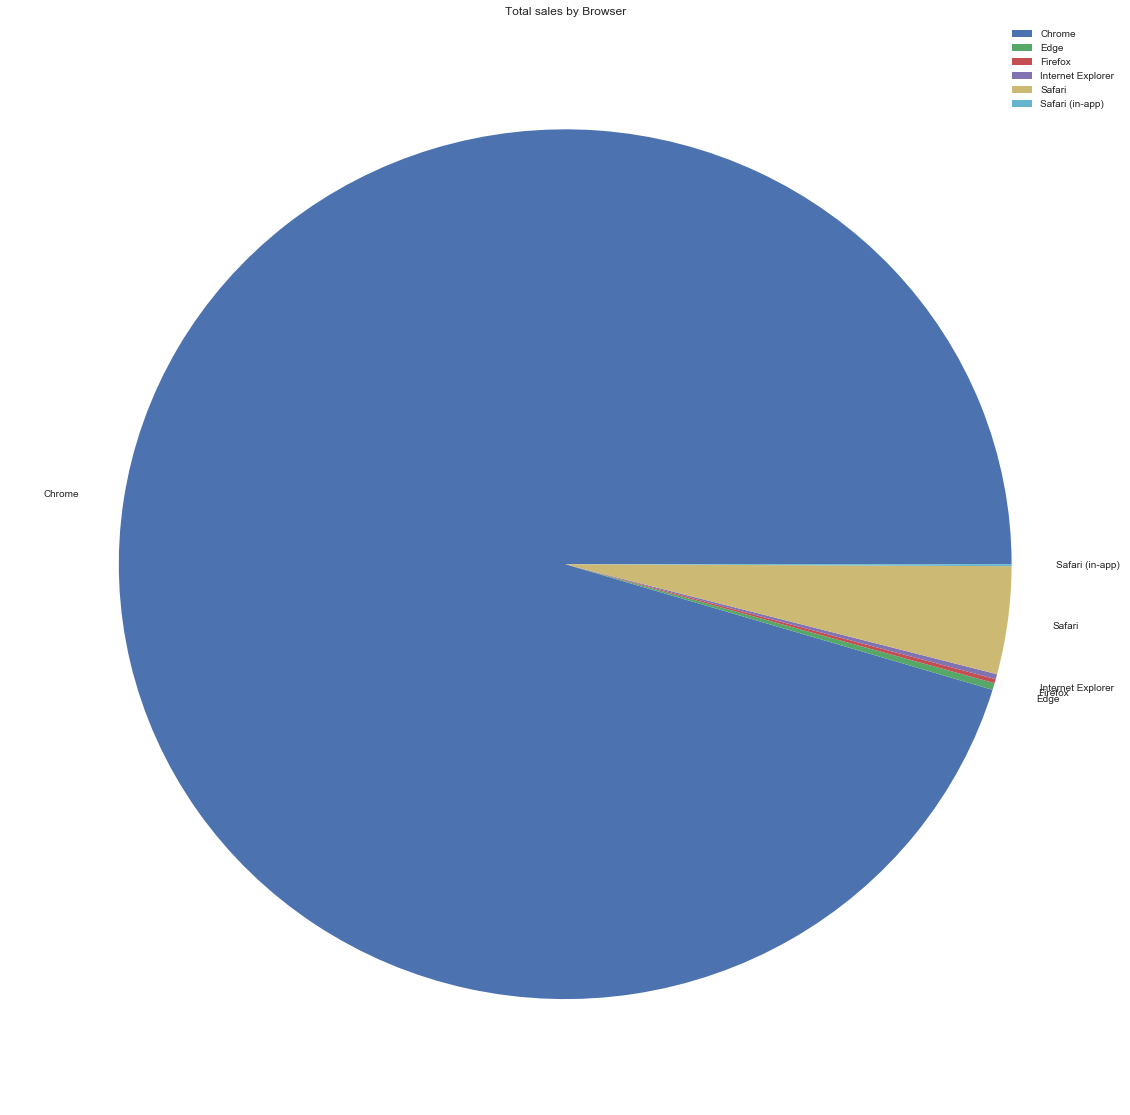

In [99]:
fix, ax = plt.subplots(figsize=(20,20))

plt.pie(browserGroup['totals_totalTransactionRevenue'], labels=browserGroup['browser'])

ax.set_title('Total sales by Browser')


plt.legend()
plt.show()

In [100]:
#Sales data is only for 9 days
salesData["date"].unique()

array(['2017-10-16', '2016-09-02', '2017-11-30', '2017-01-26',
       '2017-06-23', '2017-03-12', '2017-02-03', '2018-04-15',
       '2017-11-10'], dtype=object)

In [101]:
#Compare against full data set
data["date"].unique()

array([20171016, 20160902, 20171130, 20170126, 20170623, 20170312,
       20170203, 20180415, 20171110], dtype=int64)

In [102]:
#So it looks like we only have data for 9 days. 

In [103]:
#Feature Engineering
#Convert Categorical Columns to Numeric Features

In [104]:
#converting complex data set
nominal_columns = ["channelGrouping","browser","deviceCategory","isMobile","operatingSystem","continent","country","subContinent","medium","source"]
dummy_df = pd.get_dummies(newData[nominal_columns])
newData = pd.concat([newData, dummy_df], axis=1)
newData = newData.drop(nominal_columns, axis=1)


In [105]:
#Converting simple data set
nominal_columns = ["browser"]
dummy_df = pd.get_dummies(newDataSimple[nominal_columns])
newDataSimple = pd.concat([newDataSimple, dummy_df], axis=1)
newDataSimple = newDataSimple.drop(nominal_columns, axis=1)

In [106]:
newData.head()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_hits,totals_pageviews,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,...,source_search.mysearch.com,source_siliconvalley.about.com,source_sites.google.com,source_support.google.com,source_t.co,source_web.skype.com,source_web.whatsapp.com,source_yahoo,source_yandex,source_youtube.com
0,20171016,3162355547410993243,1508198450,1,1508198450,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20171016,8934116514970143966,1508176307,6,1508176307,2,2.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,20171016,7992466427990357681,1508201613,1,1508201613,2,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,20171016,9075655783635761930,1508169851,1,1508169851,2,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,20171016,6960673291025684308,1508190552,1,1508190552,2,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 329 entries, date to source_youtube.com
dtypes: float64(4), int64(6), uint64(1), uint8(318)
memory usage: 7.7 MB


In [108]:
#All the string values have now been added as columns with binary 0 / 1 values
newData.iloc[0]

date                                 2.017102e+07
fullVisitorId                        3.162356e+18
visitId                              1.508198e+09
visitNumber                          1.000000e+00
visitStartTime                       1.508198e+09
totals_hits                          1.000000e+00
totals_pageviews                     1.000000e+00
totals_totalTransactionRevenue       0.000000e+00
totals_transactionRevenue            0.000000e+00
totals_transactions                  0.000000e+00
totals_visits                        1.000000e+00
channelGrouping_Affiliates           0.000000e+00
channelGrouping_Direct               0.000000e+00
channelGrouping_Display              0.000000e+00
channelGrouping_Organic Search       1.000000e+00
channelGrouping_Paid Search          0.000000e+00
channelGrouping_Referral             0.000000e+00
channelGrouping_Social               0.000000e+00
browser_ADM                          0.000000e+00
browser_Amazon Silk                  0.000000e+00


In [109]:
newDataSimple.head()

,date,totals_visits,totals_totalTransactionRevenue,browser_ADM,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_BlackBerry,browser_Chrome,browser_Coc Coc,...,browser_Opera,browser_Opera Mini,browser_Playstation Vita Browser,browser_Puffin,browser_Safari,browser_Safari (in-app),browser_Samsung Internet,browser_SeaMonkey,browser_UC Browser,browser_YaBrowser
0,20171016,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20171016,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20171016,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,20171016,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20171016,1,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
newDataSimple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
date                                20000 non-null int64
totals_visits                       20000 non-null int64
totals_totalTransactionRevenue      20000 non-null float64
browser_ADM                         20000 non-null uint8
browser_Amazon Silk                 20000 non-null uint8
browser_Android Browser             20000 non-null uint8
browser_Android Webview             20000 non-null uint8
browser_BlackBerry                  20000 non-null uint8
browser_Chrome                      20000 non-null uint8
browser_Coc Coc                     20000 non-null uint8
browser_Edge                        20000 non-null uint8
browser_Firefox                     20000 non-null uint8
browser_Internet Explorer           20000 non-null uint8
browser_MRCHROME                    20000 non-null uint8
browser_Maxthon                     20000 non-null uint8
browser_Mozilla Compatible Agent  

In [111]:
newDataSimple.iloc[0]

date                                20171016.0
totals_visits                              1.0
totals_totalTransactionRevenue             0.0
browser_ADM                                0.0
browser_Amazon Silk                        0.0
browser_Android Browser                    0.0
browser_Android Webview                    0.0
browser_BlackBerry                         0.0
browser_Chrome                             0.0
browser_Coc Coc                            0.0
browser_Edge                               0.0
browser_Firefox                            1.0
browser_Internet Explorer                  0.0
browser_MRCHROME                           0.0
browser_Maxthon                            0.0
browser_Mozilla Compatible Agent           0.0
browser_Nintendo Browser                   0.0
browser_Nokia Browser                      0.0
browser_Opera                              0.0
browser_Opera Mini                         0.0
browser_Playstation Vita Browser           0.0
browser_Puffi

In [112]:
#Goal is to predict the total transaction revenue.
#Decide aboute a good evaluation strategy and justify your choice.
#Split dataset into train and test dataset.
#Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy.
#Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results.
#Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result.
#Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better?

#Predict the **total transaction revenue**. 

#- Split dataset into train and test dataset. 
#- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
#- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
#- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
#- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 


In [113]:
#Save copies of the data before each running each model

In [114]:
newDataCopy = newData.copy()
newDataSimpleCopy = newDataSimple.copy()

In [115]:
#Decide aboute a good evaluation strategy and justify your choice.
#I will use a simple linear regression to relate device and geographic information to predicted revenue.

#A linear regression is used to model the relationship between a response (transaction total) and an explanatory variable.

#Since we want to predict revenue i believe this is a good candidate to run this model on.

In [116]:
X = newData.drop(['totals_totalTransactionRevenue'], axis=1).values
print(X.shape)
y = newData.totals_totalTransactionRevenue.values
print(y.shape)

(20000, 328)
(20000,)


In [117]:
#For the simple Data
X_Simple = newDataSimple.drop(['totals_totalTransactionRevenue'], axis=1).values
print(X_Simple.shape)
y_simple = newDataSimple.totals_totalTransactionRevenue.values
print(y.shape)

(20000, 27)
(20000,)


In [118]:
#Supervised Learning example: Simple Linear regression. I'm going to use a linear regression to predict the total transaction revenue. 

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
newData['predicted'] = model.predict(X)

In [120]:
model.coef_

array([ 3.91153687e-01, -9.43527155e-16, -2.65029718e-03, -1.17268648e-07,
       -2.64937791e-03,  7.16404192e-08,  9.76005933e-08,  1.22752850e+00,
        5.43807381e-09,  2.82584889e-08, -4.59977650e-09,  5.14880676e-09,
       -1.80533631e-08, -7.06965810e-08,  6.22801130e-09, -2.80246403e-08,
        1.38256032e-07,  2.18242458e-10, -6.47612907e-10,  7.69160959e-10,
       -1.88116871e-08,  6.26133343e-10,  6.39753119e-09,  1.26751996e-10,
        3.54037395e-09,  1.53642580e-08, -1.17035413e-10,  8.82897725e-10,
        2.40672340e-11,  3.25677450e-10,  2.21429719e-10,  2.26844636e-10,
        5.66380944e-09, -7.35404364e-09, -1.19148750e-10,  1.35007447e-10,
        3.94966475e-08, -1.08164068e-09, -1.76034169e-08, -2.15930021e-10,
       -1.77833030e-09,  1.96850151e-09,  1.23712825e-07, -8.79136356e-08,
       -7.54070099e-09, -6.37664649e-09, -6.50566279e-08,  6.26133343e-10,
       -4.16674102e-09,  1.83116932e-10,  7.43630443e-09,  2.06550869e-08,
        2.21429719e-10, -

In [121]:
model.intercept_

0.0

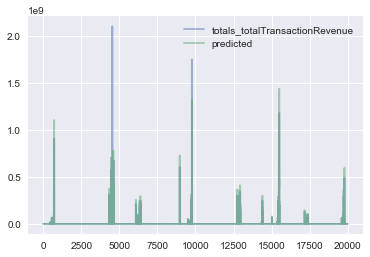

In [122]:
newData[['totals_totalTransactionRevenue','predicted']].plot(alpha=0.5)

In [123]:
#Now lets run again for the simpler data

In [124]:
model = LinearRegression(fit_intercept=False)
model.fit(X_Simple, y_simple)
newDataSimple['predicted'] = model.predict(X_Simple)

In [125]:
model.coef_

array([-1.15148112e+02,  2.23334364e+09,  8.81461665e+07,  8.94364586e+07,
        8.92348499e+07,  8.96312934e+07,  8.86848005e+07,  9.09223839e+07,
        8.93362633e+07,  8.94844203e+07,  8.92484508e+07,  8.93122028e+07,
        8.85727902e+07,  8.92595335e+07,  8.90320929e+07,  8.92127260e+07,
        8.92082924e+07,  8.91565086e+07,  8.94415121e+07,  8.93239012e+07,
        8.92454087e+07,  8.94898278e+07,  8.94376949e+07,  8.95911130e+07,
        9.03930516e+07,  8.93281354e+07,  8.92137653e+07])

In [126]:
model.intercept_

0.0

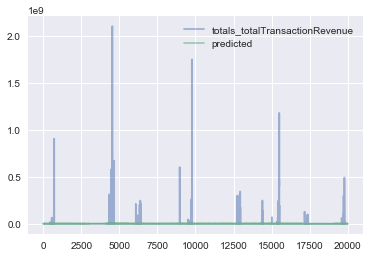

In [127]:
newDataSimple[['totals_totalTransactionRevenue','predicted']].plot(alpha=0.5)

In [128]:
#It looks like the simpler data may be more accurate

In [129]:
#Another Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [131]:
lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.84 (+/- 0.14)


In [132]:
lr = LinearRegression()
kfolds = cv.KFold(X_Simple.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X_Simple, y_simple, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.00 (+/- 0.00)


In [133]:
#Looks like the larger data set is more accurate. I'd guess it's because it still conatins columns that have transactions and transaction revenue. 

In [134]:
##################################################
#Supervised learning example: Gaussian naive Bayes
##################################################

In [135]:
#Reset the data
newData = newDataCopy.copy()
newDataSimple = newDataSimpleCopy.copy()

In [136]:
#For the complex data
X = newData.drop(['totals_totalTransactionRevenue'], axis=1).values
print(X.shape)
y = newData.totals_totalTransactionRevenue.values
print(y.shape)

(20000, 328)
(20000,)


In [137]:
#For the simple Data
X_Simple = newDataSimple.drop(['totals_totalTransactionRevenue'], axis=1).values
print(X_Simple.shape)
y_simple = newDataSimple.totals_totalTransactionRevenue.values
print(y.shape)

(20000, 27)
(20000,)


In [138]:
model = LinearRegression(fit_intercept=True)

In [139]:
from sklearn.cross_validation import train_test_split

In [140]:
#Splitting the data into training and testing data. Since there are so few sales i'll stick to a 50 / 50 split.

In [141]:
 Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
#Create model and fit the data to it
model = GaussianNB()
model.fit(Xtrain, ytrain) 

GaussianNB(priors=None)

In [144]:
#Predict the new values
y_model = model.predict(Xtest) 

In [145]:
#Measure the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9836

In [146]:
#Now testing on the simpler data set

In [147]:
 Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X_Simple, y_simple, random_state=1)

In [148]:
#Create model and fit the data to it
model = GaussianNB() 
model.fit(Xtrain2, ytrain2) 

GaussianNB(priors=None)

In [149]:
 #Predict the new values
y_model2 = model.predict(Xtest2)

In [150]:
accuracy_score(ytest2, y_model2)

0.136

In [151]:
#The first data is way more accutare than the simpler data. 
#I'd assume it's because columns such as transaction and transaction revenue were kept 

In [152]:
############################################################
#Unsupervised learning example: Principal Component Analysis
############################################################

In [153]:
#Dimension reduction. I'm using the simple data set because the models did not like the complex one

In [154]:
#Let's use unsupervised learning to see if there is any relationship with the date

In [155]:
X = newDataSimple.drop(['date'], axis=1).values
print(X.shape)
y = newDataSimple.date.values
print(y.shape)

(20000, 27)
(20000,)


In [156]:
from sklearn.decomposition import PCA

In [157]:
#reduce the dimensions to 2
model = PCA(n_components=2)

In [158]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [159]:
#Unsupervised so we are using the transform
X_2D = model.transform(X)

In [160]:
X_2D.shape

(20000, 2)

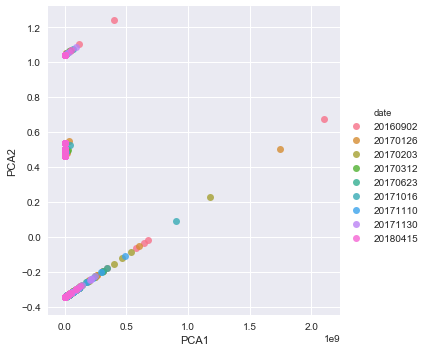

In [161]:
newDataSimple['PCA1'] = X_2D[:, 0]
newDataSimple['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1","PCA2", hue='date', data=newDataSimple, fit_reg=False);

In [162]:
#Trying to see if there is any correlation with the date when reducing to two dimensions. Doesn't look like it. 

In [163]:
############################################################
#Unsupervised learning example: Gaussian Mixture Models
############################################################

In [164]:
from sklearn.mixture import GaussianMixture  

In [165]:
model = GaussianMixture (n_components=2, covariance_type='full')

In [166]:
model.fit(X_Simple) 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [167]:
#Unsupervised clustering
y_gmm = model.predict(X_Simple)

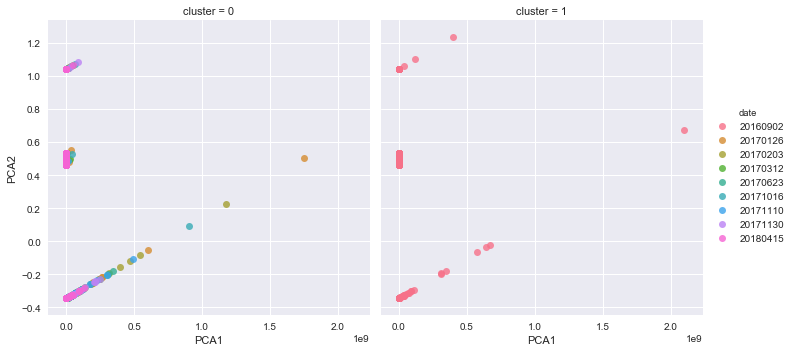

In [168]:
newDataSimple['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=newDataSimple, hue='date', col='cluster', fit_reg=False);

In [169]:
#Again it doesn't look like we see a lot of clustering here. We can rule out any clusting by date

In [170]:
#Running the supervised learning from before

In [171]:
model = LinearRegression(fit_intercept=False)
model.fit(X_Simple, y_simple)
newDataSimple['predicted'] = model.predict(X_Simple)

In [172]:
model.coef_

array([-1.15148112e+02,  2.23334364e+09,  8.81461665e+07,  8.94364586e+07,
        8.92348499e+07,  8.96312934e+07,  8.86848005e+07,  9.09223839e+07,
        8.93362633e+07,  8.94844203e+07,  8.92484508e+07,  8.93122028e+07,
        8.85727902e+07,  8.92595335e+07,  8.90320929e+07,  8.92127260e+07,
        8.92082924e+07,  8.91565086e+07,  8.94415121e+07,  8.93239012e+07,
        8.92454087e+07,  8.94898278e+07,  8.94376949e+07,  8.95911130e+07,
        9.03930516e+07,  8.93281354e+07,  8.92137653e+07])

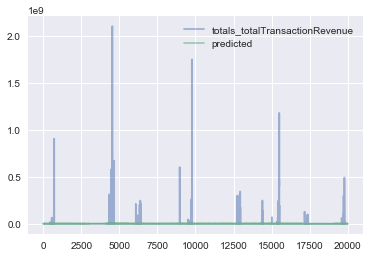

In [173]:
newDataSimple[['totals_totalTransactionRevenue','predicted']].plot(alpha=0.5)

In [174]:
#It doesn't look like much has changed with our results.

In [175]:
lr = LinearRegression()
kfolds = cv.KFold(X_Simple.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X_Simple, y_simple, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.00 (+/- 0.00)


In [176]:
#Still at 0 :(

#I have doubts about the quality of the data. I think that there just isn't enough positive data.
#Less than 1% of the data is sales so i'm guess the models are dealing with too much data to generate strong correlations

In [177]:
#Creating a neural network

#I know this was descoped from the project but I spent several hours working on it so i'm keeping it :)


In [178]:
newDataSimple = newDataSimpleCopy.copy()

In [179]:
#For the simple Data
X_Simple = newDataSimple.drop(['totals_totalTransactionRevenue'], axis=1).values
print(X_Simple.shape)
y_simple = newDataSimple.totals_totalTransactionRevenue.values
print(y.shape)

(20000, 27)
(20000,)


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [181]:
#Data Preprocessing
#The neural network in Python may have difficulty converging before the maximum number of iterations allowed 
#if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling
#it is highly recommended to scale your data. 
#Note that you must apply the same scaling to the test set for meaningful results.
#There are a lot of different methods for normalization of data,
#we will use the built-in StandardScaler for standardization.

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler = StandardScaler()

In [184]:
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [185]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [186]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [187]:
#Time to train the model

In [188]:
#SciKit Learn. 
#We will import the Multi-Layer Perceptron Classifier model from the neural_network library of SciKit-Learn

In [189]:
from sklearn.neural_network import MLPClassifier

In [190]:
#Create model and define hidden layer size

In [191]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=500)

In [192]:
#Fit the model

In [193]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [194]:
#Get the predictions from the model

In [195]:
predictions = mlp.predict(X_test)

In [196]:
#Let's inspect how our report did

In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [198]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

   20160902       0.14      0.01      0.03       672
   20170126       0.00      0.00      0.00       553
   20170203       0.00      0.00      0.00       518
   20170312       0.22      0.02      0.04       412
   20170623       0.00      0.00      0.00       533
   20171016       0.23      0.04      0.07       746
   20171110       0.00      0.00      0.00       240
   20171130       0.16      0.93      0.27       796
   20180415       0.27      0.04      0.07       530

avg / total       0.13      0.16      0.07      5000



C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [199]:
print(confusion_matrix(y_test,predictions))

[[ 10   0   0   7   0  10   0 645   0]
 [  9   0   0   6   0  12   0 517   9]
 [ 12   0   0   0   0   8   0 488  10]
 [  9   0   0   8   0   9   0 370  16]
 [  3   0   0   2   0   5   0 518   5]
 [  8   0   0   3   0  30   0 701   4]
 [  2   0   0   2   0   6   0 228   2]
 [ 11   0   0   5   0  26   0 742  12]
 [  9   0   0   3   0  22   0 475  21]]


In [200]:
#Still unable to classify by date. our precision is pretty low. 
#It does look like we impoved a bit over the unsupervised models
#However i think the conclusion date is not a good indicator of price and our models did not accurately predict the price